<a href="https://colab.research.google.com/github/Ozk18532/INTELIGENCIA-COMPUTACIONAL-Oscar-Mercado/blob/main/California__Oscar_M.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-3769059636.py:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x[col], ax=ax)
/tmp/ipython-input-3769059636.py:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x[col], ax=ax)
/tmp/ipython-input-3769059636.py:23: UserWarning: 

`distplot` is a deprecated function and will be 

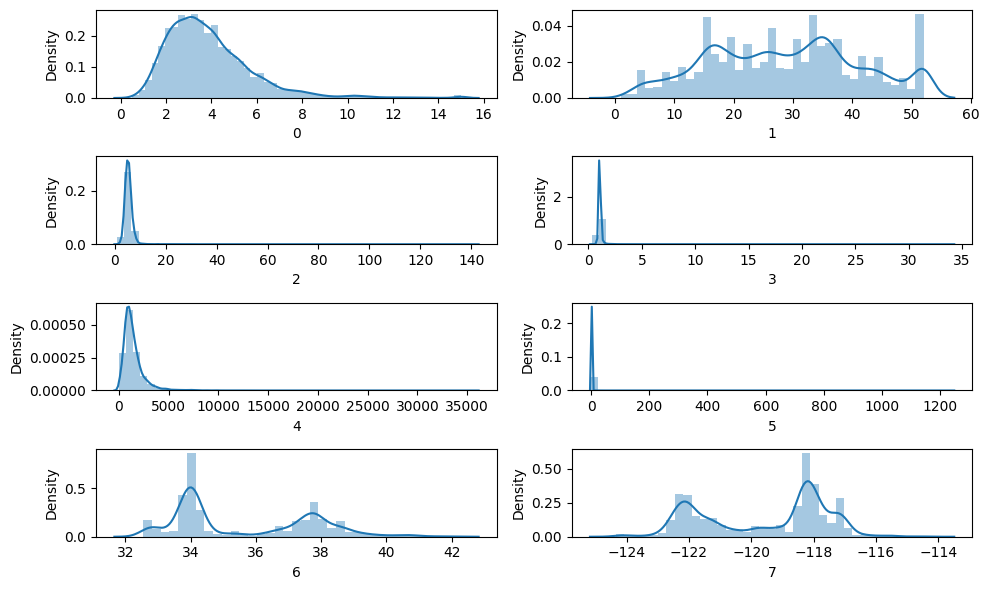

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import seaborn as sns
from sklearn.datasets import fetch_california_housing

# Cargar el dataset
x,y = fetch_california_housing(return_X_y=True)

x=pd.DataFrame(x)
y=pd.DataFrame(y)




fig, ax = plt.subplots(4,2, figsize=(10,6))

for ax, col in zip(ax.flatten(), x.columns):
  sns.distplot(x[col], ax=ax)

plt.tight_layout()
plt.show()

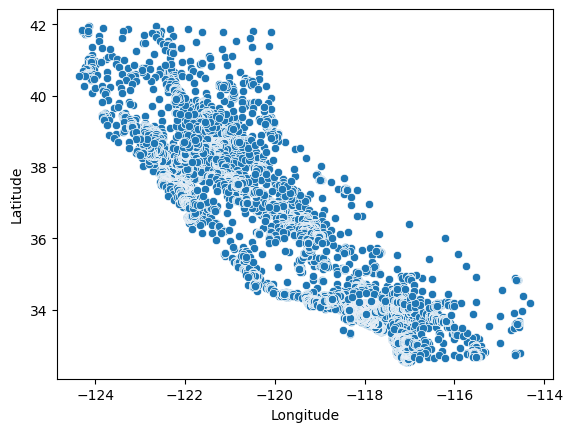

In [48]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x=X["Longitude"], y=X["Latitude"])
plt.show()


<Axes: ylabel='Count'>

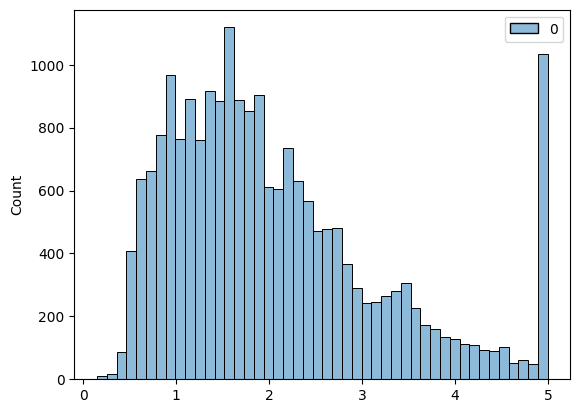

In [49]:
sns.histplot(y)

In [50]:
x.columns
data.feature_names


['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

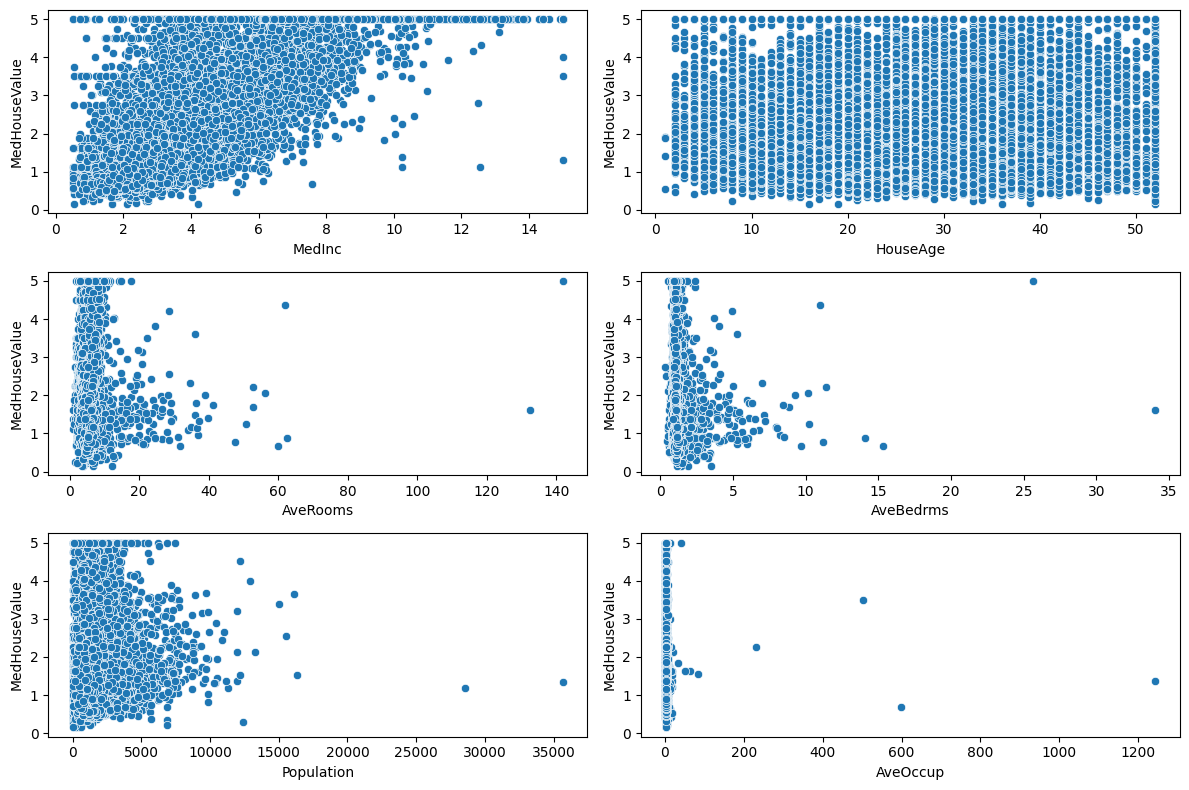

In [51]:

data = fetch_california_housing()

x = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="MedHouseValue")

import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 2, figsize=(12, 8))
cols = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

for ax, col in zip(axs.flatten(), cols):
    sns.scatterplot(x=x[col], y=y, ax=ax)

plt.tight_layout()
plt.show()



In [52]:
from sklearn.model_selection import train_test_split

x_train, x_testval, y_train, y_testval = train_test_split(X, y, test_size=0.2, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_testval, y_testval, test_size=0.5, random_state=42)


In [53]:
Q1 = x_train.quantile(0.25)
Q3 = x_train.quantile(0.75)
IQR = Q3-Q1

x_train_capped = x_train.copy()
x_test_capped = x_test.copy()
x_val_capped = x_val.copy()

for col in x_train.columns:
  lower_bound = Q1[col] - 1.5*IQR[col]
  upper_bound = Q3[col] + 1.5*IQR[col]
  x_train_capped[col] = x_train[col].clip(lower=lower_bound, upper=upper_bound)
  x_test_capped[col] = x_test[col].clip(lower=lower_bound, upper=upper_bound)
  x_val_capped[col] = x_val[col].clip(lower=lower_bound, upper=upper_bound)

x_train= x_train_capped
x_test = x_test_capped
x_val = x_val_capped

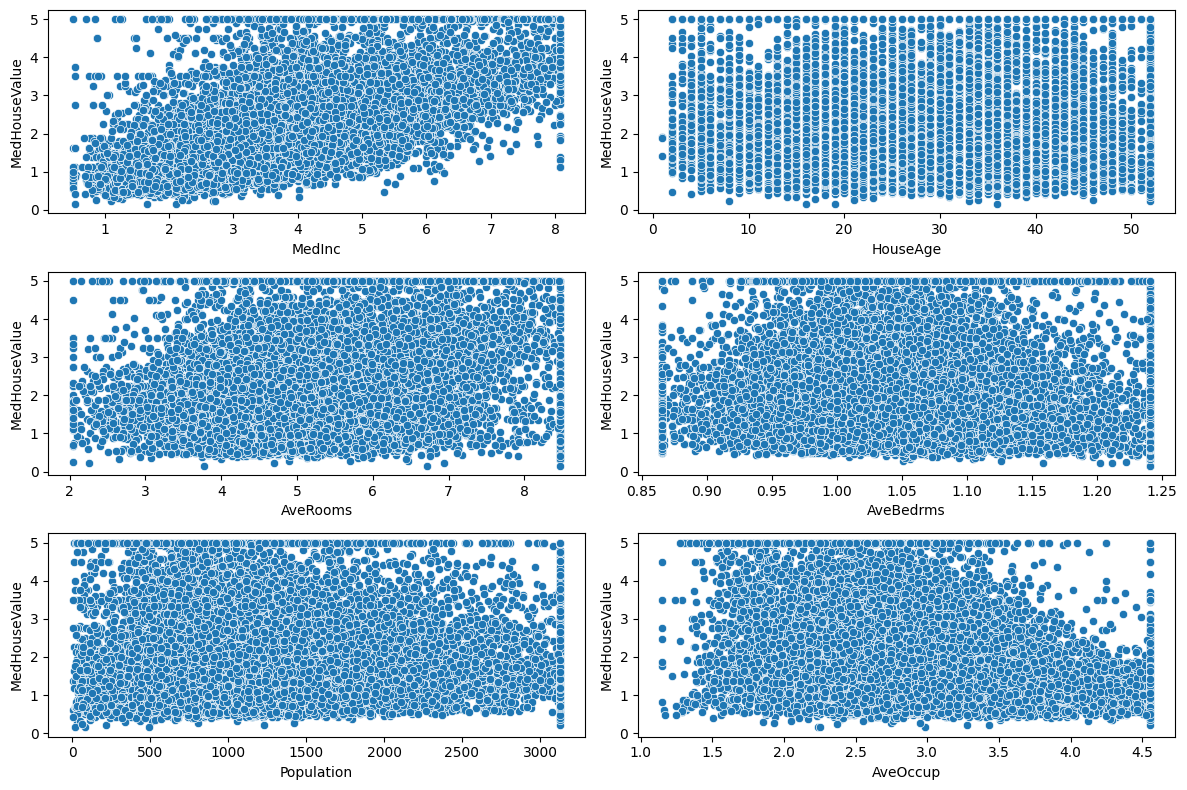

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 2, figsize=(12, 8))
cols = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

for ax, col in zip(axs.flatten(), cols):
    sns.scatterplot(x=x_train[col], y=y_train, ax=ax)

plt.tight_layout()
plt.show()

In [73]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline

preprocessing = make_pipeline(
    ColumnTransformer([('num', MinMaxScaler(), x_train.columns)
        ]
    )
)

x_train_scaled = preprocessing.fit_transform(x_train)
x_test_scaled = preprocessing.transform(x_test)
x_val_scaled = preprocessing.transform(x_val)

sns.histplot

<function seaborn.distributions.histplot(data=None, *, x=None, y=None, hue=None, weights=None, stat='count', bins='auto', binwidth=None, binrange=None, discrete=None, cumulative=False, common_bins=True, common_norm=True, multiple='layer', element='bars', fill=True, shrink=1, kde=False, kde_kws=None, line_kws=None, thresh=0, pthresh=None, pmax=None, cbar=False, cbar_ax=None, cbar_kws=None, palette=None, hue_order=None, hue_norm=None, color=None, log_scale=None, legend=True, ax=None, **kwargs)>

In [75]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

model = LinearRegression()
model.fit(x_train_scaled, y_train)

def evaluate_model(model, x, y):
    y_pred = model.predict(x)
    return {
        "MAE": mean_absolute_error(y, y_pred),
        "MSE": mean_squared_error(y, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y, y_pred)),
        "R2": r2_score(y, y_pred)
    }

train_metrics = evaluate_model(model, x_train_scaled, y_train)
val_metrics = evaluate_model(model, x_val_scaled, y_val)

metrics_df = (
    pd.DataFrame([train_metrics, val_metrics], index=["train", "val"])
    .reset_index()
    .rename(columns={"index": "Dataset"})
)

metrics_df



,Dataset,MAE,MSE,RMSE,R2
0,train,0.492680,0.437935,0.661767,0.672395
1,val,0.502495,0.452564,0.672729,0.652773


In [78]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

m = RandomForestRegressor(random_state=42)
m.fit(x_train_scaled, y_train)

_train_preds = evaluate_model(m, x_train_scaled, y_train)
_val_preds = evaluate_model(m, x_val_scaled, y_val)

_metrics = (
    pd.DataFrame([_train_preds, _val_preds], index=["train", "val"])
    .reset_index()
    .rename(columns={"index": "Dataset"})
)

_metrics



,Dataset,MAE,MSE,RMSE,R2
0,train,0.123236,0.035717,0.188990,0.973281
1,val,0.329004,0.259216,0.509132,0.801119


In [80]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    "n_estimators": [10, 20, 50, 100],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
}

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    n_jobs=-1
)

grid_search.fit(x_train_scaled, y_train)



GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 20, 50, 100]})

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    "n_estimators": [10, 20, 50, 100],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
}

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    scoring="neg_mean_squared_error"
)

grid_search.fit(x_train_scaled, y_train)


In [ ]:
best_model = grid_search.best_estimator_

train_metrics = evaluate_model(best_model, x_train_scaled, y_train)
val_metrics = evaluate_model(best_model, x_val_scaled, y_val)
test_metrics = evaluate_model(best_model, x_test_scaled, y_test)


metrics_df = (
    pd.DataFrame([train_metrics, val_metrics, test_metrics], index=["train", "val", "test"])
    .reset_index()
    .rename(columns={"index": "Dataset"})
)

metrics_df